In [149]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [150]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

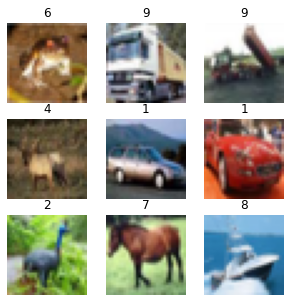

In [151]:
plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(int(y_train[i]))
    plt.axis("off")

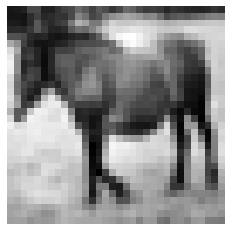

In [152]:
img = x_train[7]
img = np.dot(img[...,:3], [1, 1, 1])
plt.axis('off')
plt.imshow(img, cmap='gray')

In [153]:
img.shape

(32, 32)

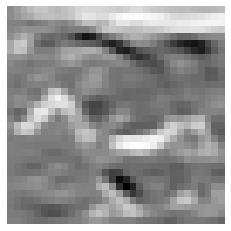

In [154]:
img_filter = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

new_image = np.zeros(img.shape)
img_pad = np.pad(img, 1, 'constant')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_image[i, j] = \
        img_pad[i-1, j-1] * img_filter[0, 0] + \
        img_pad[i-1, j]   * img_filter[0, 1] + \
        img_pad[i-1, j+1] * img_filter[0, 2] + \
        img_pad[i,   j-1] * img_filter[1, 0] + \
        img_pad[i,   j]   * img_filter[1, 1] + \
        img_pad[i,   j+1] * img_filter[1, 2] +\
        img_pad[i+1, j-1] * img_filter[2, 0] + \
        img_pad[i+1, j]   * img_filter[2, 1] + \
        img_pad[i+1, j+1] * img_filter[2, 2]

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

In [155]:
NUM_CLASSES = 10

In [156]:
# data comes in integers between 0 and 255 for each pixel channel
# convert to a range between –1 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

In [157]:
x_train.shape

(50000, 32, 32, 3)

In [158]:
# change the integer labeling of the images to one-hot-encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
y_train[0][0]

0.0

In [159]:
(y_train.shape, y_test.shape)

((50000, 10), (10000, 10))

In [160]:
input_layer = Input(shape=(32,32, 3))
input_layer.shape

TensorShape([None, 32, 32, 3])

In [161]:
conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4), # our filter, (4 × 4 × 3 + 1) × 10 = 490, the +1 is for the bias
    strides=2,
    padding='same', # the padding allows the kernel to extend over the edge of the image
)(input_layer)

conv_layer_2 = Conv2D(
    filters=20,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
)(conv_layer_1)

In [162]:
x = Flatten()(conv_layer_2) # next dense layer expects flatten input
x.shape

TensorShape([None, 1280])

In [163]:
x = Dense(units=100, activation = 'relu')(x)
x.shape

TensorShape([None, 100])

In [164]:
x = Dropout(rate=0.25)(x)

In [165]:
output_layer = Dense(units=10, activation = 'softmax')(x)
output_layer.shape

TensorShape([None, 10])

In [166]:
model = Model(input_layer, output_layer)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               128100    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010

In [167]:
opt = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/dev/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [168]:
model.fit(
    x_train, # raw image data
    y_train, # hot encoded class labels
    batch_size=32, # how many observations (images) at each training step
                   # the larger the batch size, the more stable the gradient calculation, but the slower each training step
    epochs=25,
    shuffle=True, # batches should be randomly drawn from the training data
)

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7336 - accuracy: 0.3872
Epoch 2/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5365 - accuracy: 0.4614
Epoch 3/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4625 - accuracy: 0.4887
Epoch 4/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4113 - accuracy: 0.5058
Epoch 5/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3736 - accuracy: 0.5200
Epoch 6/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3413 - accuracy: 0.5334
Epoch 7/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3065 - accuracy: 0.5437
Epoch 8/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2761 - accuracy: 0.5543
Epoch 9/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2458 - accuracy: 0.5621
Epoch 10/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.219

In [169]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.6603 - accuracy: 0.4742


[1.6602559089660645, 0.4742000102996826]

In [170]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 1ms/step


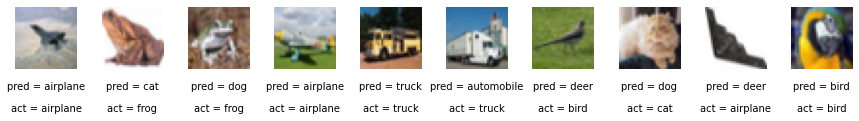

In [171]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.imshow(img)